Naufal Rasyid Sutansyah



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # plotting
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
#Read Dataset
amd = pd.read_csv('AMD.csv')
aapl = pd.read_csv('AAPL.csv')

In [3]:
amd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
2,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
3,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
4,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [4]:
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


Berikut tampilan data set untuk setiap tahunya, karena di soal dikatakan hanya menggunakan date dan close saja maka saya lampirkan sebagai berikut

In [5]:
#Hanya menggunakan date dan close kolom
amd = amd[['Date', 'Close']]
aapl = aapl[['Date', 'Close']]

1. a) EDA Dataset

---


notes *yang akan digunakan kolom Date dan Close saja

In [6]:
print(amd.head())
print(aapl.head())

         Date     Close
0  1980-03-17  3.145833
1  1980-03-18  3.031250
2  1980-03-19  3.041667
3  1980-03-20  3.010417
4  1980-03-21  2.916667
         Date     Close
0  1980-12-12  0.513393
1  1980-12-15  0.486607
2  1980-12-16  0.450893
3  1980-12-17  0.462054
4  1980-12-18  0.475446


In [7]:
# EDA Dataset AMD
amd.shape

(10098, 2)

In [8]:
aapl.shape

(9909, 2)

In [9]:
# EDA Dataset AMD
amd.describe()

,Close
count,10098.000000
mean,11.210802
std,8.283645
min,1.620000
25%,4.937500
50%,9.062500
75%,14.707500
max,58.900002


In [10]:
aapl.describe()

,Close
count,9909.000000
mean,32.618030
std,58.471899
min,0.196429
25%,1.071429
50%,1.732143
75%,35.761429
max,327.200012


Di atas merupakan output summary statics dari data set, tidak ditemukanya anomali dari hasil tersebut

In [11]:
amd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10098 non-null  object 
 1   Close   10098 non-null  float64
dtypes: float64(1), object(1)
memory usage: 157.9+ KB


In [12]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9909 non-null   object 
 1   Close   9909 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.0+ KB


In [13]:
#Checking Missing Values AMD
missing_val = amd.isnull().sum()
missing_val_percentile = (100 * missing_val)/len(amd)
missing_val_table = pd.concat([missing_val,missing_val_percentile], axis = 1)
missing_val_table = missing_val_table.rename(columns ={ 0: 'Missing Values', 1: 'Percentage'})
missing_val_table = missing_val_table.sort_values(by = 'Missing Values', ascending = False)
missing_val_table

,Missing Values,Percentage
Date,0,0.0
Close,0,0.0


In [14]:
#Checking Missing Values AAPL
missing_val = aapl.isnull().sum()
missing_val_percentile = (100 * missing_val)/len(aapl)
missing_val_table = pd.concat([missing_val,missing_val_percentile], axis = 1)
missing_val_table = missing_val_table.rename(columns ={ 0: 'Missing Values', 1: 'Percentage'})
missing_val_table = missing_val_table.sort_values(by = 'Missing Values', ascending = False)
missing_val_table

,Missing Values,Percentage
Date,0,0.0
Close,0,0.0


There is NO missing values in AMD and AAPL dataset, then we gonna visualize close and date


In [15]:
#Untuk plot mengubah date menjadi index
amd['Date'] = pd.to_datetime(amd['Date'])
amd.set_index('Date', inplace=True)

In [16]:
#Untuk plot mengubah date menjadi index
aapl['Date'] = pd.to_datetime(aapl['Date'])
aapl.set_index('Date', inplace=True)

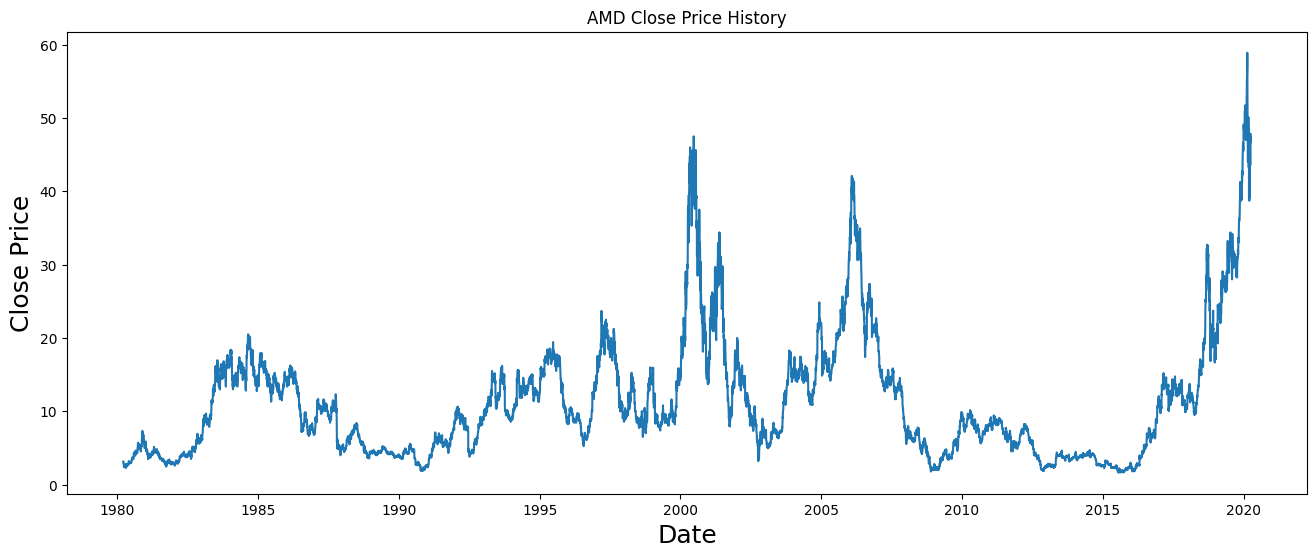

In [17]:
#Plot close berdasarkan tahun
plt.figure(figsize=(16,6))
plt.title('AMD Close Price History')
plt.plot(amd['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

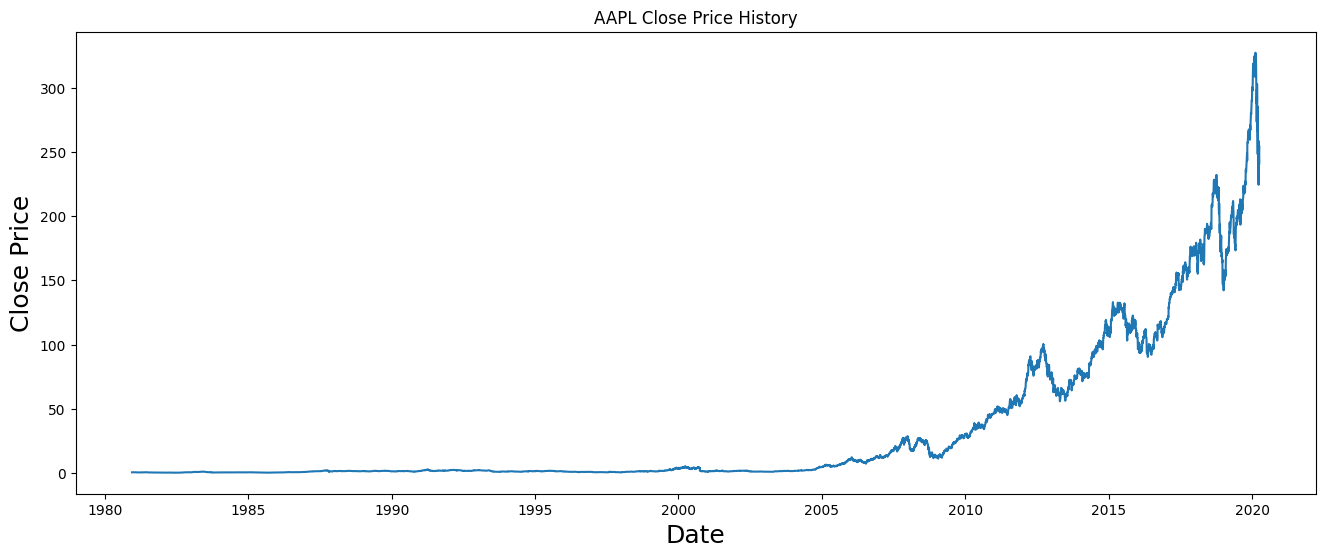

In [18]:
#Plot close berdasarkan tahun
plt.figure(figsize=(16,6))
plt.title('AAPL Close Price History')
plt.plot(aapl['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

1. a) Prapose Dataset

In [19]:
# Extract the 'Close' column from the 'amd' DataFrame
data = amd[['Close']]

# # # Convert the index to datetime
data.index = pd.to_datetime(data.index)

# Extract the values of the 'Close' column
dataset = data['Close'].values

# Scale the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

scaled_data

array([[0.02663815],
       [0.02463774],
       [0.0248196 ],
       ...,
       [0.80726256],
       [0.76571226],
       [0.73393853]])

Pisahkan data time series
tersebut menjadi dua bagian input dan output dengan window size = 5 [dari hari senin s.d
jumat] dan horizon = 1 [hari senin saja].

In [20]:
# Define window size and horizon
window_size = 5
horizon = 1

# Separate the dataset into input (X) and output (y) with window size and horizon
X = []
y = []
for i in range(window_size, len(scaled_data) - horizon + 1):
    X.append(scaled_data[i - window_size:i, 0])
    y.append(scaled_data[i + horizon - 1, 0])

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into train, validation, and test sets (80:10:10)
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, shuffle=False)

print("Train set shapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print()
print("Validation set shapes:")
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print()
print("Test set shapes:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Train set shapes:
X_train shape: (8074, 5)
y_train shape: (8074,)

Validation set shapes:
X_val shape: (1009, 5)
y_val shape: (1009,)

Test set shapes:
X_test shape: (1010, 5)
y_test shape: (1010,)


**B) LSTM Modeling AMD**

Modeling 1

In [55]:
# Define the baseline LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)

# Make predictions using the trained model
predictions = model.predict(X_test)

Epoch 1/10
248/248 [==============================] - 4s 6ms/step - loss: 1.3515e-04 - val_loss: 3.1932e-04
Epoch 2/10
248/248 [==============================] - 1s 5ms/step - loss: 2.1706e-06 - val_loss: 2.8265e-04
Epoch 3/10
248/248 [==============================] - 1s 5ms/step - loss: 2.3506e-06 - val_loss: 3.1378e-04
Epoch 4/10
248/248 [==============================] - 1s 5ms/step - loss: 2.2039e-06 - val_loss: 2.2424e-04
Epoch 5/10
248/248 [==============================] - 2s 8ms/step - loss: 2.6760e-06 - val_loss: 2.8991e-04
Epoch 6/10
248/248 [==============================] - 1s 5ms/step - loss: 2.2704e-06 - val_loss: 2.0690e-04
Epoch 7/10
248/248 [==============================] - 1s 5ms/step - loss: 2.4788e-06 - val_loss: 2.7952e-04
Epoch 8/10
248/248 [==============================] - 1s 5ms/step - loss: 2.3791e-06 - val_loss: 2.4267e-04
Epoch 9/10
248/248 [==============================] - 1s 5ms/step - loss: 2.5835e-06 - val_loss: 2.8890e-04
Epoch 10/10
31/31 [=========

In [56]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50)                10400     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [22]:
# make a prediction
model_pred = model.predict(X_test)

# Reshape X_test and y_test for concatenation
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1]))
y_test_reshaped = y_test.reshape((len(y_test), 1))

# Invert scaling for forecast
inv_y_pred= np.concatenate((model_pred, X_test_reshaped), axis=1)
inv_y_pred= scaler.inverse_transform(inv_y_pred)
inv_y_pred= inv_y_pred[:, 0]

# Invert scaling for actual
inv_y = np.concatenate((y_test_reshaped, X_test_reshaped), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]

32/32 [==============================] - 0s 3ms/step


In [23]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_y_pred))

# Calculate MAE
mae = mean_absolute_error(inv_y, inv_y_pred)

# Calculate MAPE
mape = np.mean(np.abs((inv_y - inv_y_pred) / inv_y)) * 100

# Print the evaluation metrics
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f' % mape)

Test RMSE: 1.016
Test MAE: 0.643
Test MAPE: 3.446


dari hasil diatas didapat metics eval masih tergolong tinggi

In [24]:
#Show Actual vs Predicted
result_comp = pd.DataFrame(list(zip(inv_y, inv_y_pred)),
               columns =['Actual Close Price', 'Predicted Close Price'])
result_comp

,Actual Close Price,Predicted Close Price
0,2.860000,2.816287
1,2.850000,2.845691
2,2.830000,2.863103
3,2.830000,2.864121
4,2.760000,2.858720
...,...,...
1005,47.500000,44.364117
1006,46.580002,45.401877
1007,47.860001,46.303330
1008,45.480000,46.736091


**C) Modifikasi Model**

Model 2

LSTM MODEL 2:
Saya memodifikasi dengan cara menambahkan layer LSTM tambahan dengan jumlah unit 128 dan mengubah batch size menjadi 86. Selain itu, saya juga akan menambahkan layer Dense tambahan dengan aktivasi 'relu' dan jumlah unit 64.

In [25]:
# Define the modified LSTM model with additional layers or different hyperparameters
model2 = Sequential()
model2.add(LSTM(units=128, activation='relu', input_shape=(window_size, 1)))
model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(units=1))

# Compile the modified model
model2.compile(optimizer='adam', loss='mean_squared_error')

# Train the modified model
model2.fit(X_train, y_train, epochs=100, batch_size=86, validation_data=(X_val, y_val))

Epoch 1/100
94/94 [==============================] - 9s 37ms/step - loss: 0.0038 - val_loss: 2.7121e-05
Epoch 2/100
94/94 [==============================] - 3s 29ms/step - loss: 1.7319e-04 - val_loss: 1.7414e-05
Epoch 3/100
94/94 [==============================] - 3s 28ms/step - loss: 1.7272e-04 - val_loss: 1.6174e-05
Epoch 4/100
94/94 [==============================] - 3s 34ms/step - loss: 1.6263e-04 - val_loss: 9.1664e-06
Epoch 5/100
94/94 [==============================] - 3s 36ms/step - loss: 1.5432e-04 - val_loss: 8.2465e-06
Epoch 6/100
94/94 [==============================] - 3s 30ms/step - loss: 1.5742e-04 - val_loss: 2.1580e-05
Epoch 7/100
94/94 [==============================] - 2s 25ms/step - loss: 1.4902e-04 - val_loss: 7.1044e-06
Epoch 8/100
94/94 [==============================] - 1s 15ms/step - loss: 1.4504e-04 - val_loss: 2.4709e-05
Epoch 9/100
94/94 [==============================] - 1s 16ms/step - loss: 1.4993e-04 - val_loss: 6.6448e-05
Epoch 10/100
94/94 [============

In [26]:
# make a prediction
y_pred = model2.predict(X_test)

# Reshape X_test and y_test for concatenation
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1]))
y_test_reshaped = y_test.reshape((len(y_test), 1))

# Invert scaling for forecast
inv_y_pred= np.concatenate((y_pred, X_test_reshaped), axis=1)
inv_y_pred= scaler.inverse_transform(inv_y_pred)
inv_y_pred= inv_y_pred[:, 0]

# Invert scaling for actual
inv_y = np.concatenate((y_test_reshaped, X_test_reshaped), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]

32/32 [==============================] - 0s 6ms/step


In [27]:
# Calculate RMSE
rmse2 = np.sqrt(mean_squared_error(inv_y, inv_y_pred))

# Calculate MAE
mae2 = mean_absolute_error(inv_y, inv_y_pred)

# Calculate MAPE
mape2 = np.mean(np.abs((inv_y - inv_y_pred) / inv_y)) * 100

# Print the evaluation metrics
print('Test RMSE: %.3f' % rmse2)
print('Test MAE: %.3f' % mae2)
print('Test MAPE: %.3f' % mape2)

Test RMSE: 0.897
Test MAE: 0.525
Test MAPE: 2.760


Penambahan layer LSTM tambahan dan layer Dense dengan aktivasi 'relu' pada LSTM MODEL 2 dapat membantu model untuk memahami pola yang lebih kompleks dalam data dan mengekstraksi fitur yang lebih baik. Hal ini mengarah pada performa yang lebih baik dalam memprediksi close price.

Dapat dilihat arsitektur yang dimodifikasi pada LSTM MODEL 2 memberikan performa yang lebih optimal dalam memprediksi close price pada dataset.

In [28]:
#Show Actual vs Predicted
result_comp2 = pd.DataFrame(list(zip(inv_y, inv_y_pred)),
               columns =['Actual Close Price', 'Predicted Close Price'])
result_comp2

,Actual Close Price,Predicted Close Price
0,2.860000,2.813258
1,2.850000,2.815355
2,2.830000,2.809439
3,2.830000,2.792375
4,2.760000,2.792775
...,...,...
1005,47.500000,44.050336
1006,46.580002,47.656482
1007,47.860001,46.046770
1008,45.480000,47.927026


**D) Metrics Evaluation kedua LSTM**

In [29]:
# Print the evaluation metrics
print("LSTM MODEL 1")
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f' % mape)
print()
# Print the evaluation metrics
print("LSTM MODEL 2")
print('Test RMSE: %.3f' % rmse2)
print('Test MAE: %.3f' % mae2)
print('Test MAPE: %.3f' % mape2)

LSTM MODEL 1
Test RMSE: 1.016
Test MAE: 0.643
Test MAPE: 3.446

LSTM MODEL 2
Test RMSE: 0.897
Test MAE: 0.525
Test MAPE: 2.760


Dilihat dari metrik yang disediakan, kita dapat melihat perbedaan kinerja antara kedua model ini.

Model LSTM 1 memiliki nilai RMSE yang lebih tinggi, yaitu sebesar 1.016. Ini menunjukkan bahwa prediksi model ini memiliki kesalahan rata-rata yang lebih besar dalam memprediksi close price dibandingkan dengan model LSTM 2 yang memiliki RMSE sebesar 0.897. Dengan kata lain, model LSTM 2 cenderung memberikan hasil prediksi yang lebih dekat dengan close price yang sebenarnya.

Selain itu, model LSTM 2 juga memiliki nilai MAE dan MAPE yang lebih rendah dibandingkan dengan model LSTM 1. MAE pada model LSTM 2 adalah 0.525, yang menunjukkan bahwa rata-rata kesalahan absolut dalam prediksi close price cenderung lebih kecil dibandingkan dengan model LSTM 1 yang memiliki MAE 0.643. Sementara itu, MAPE pada model LSTM 2 adalah 2.760, yang menunjukkan bahwa rata-rata persentase kesalahan absolut dalam prediksi close price juga lebih rendah dibandingkan dengan model LSTM 1 yang memiliki MAPE 3.446.

Berdasarkan analisis ini, dapat disimpulkan bahwa model LSTM 2 lebih baik dalam memprediksi close price pada dataset pasar saham. Model ini memberikan hasil prediksi yang lebih akurat dengan nilai RMSE, MAE, dan MAPE yang lebih rendah dibandingkan dengan model LSTM 1.

In [30]:
# Print all  modeling results
print("Model 1 Results:")
print(result_comp)

print("\nModel 2 Results:")
print(result_comp2)

Model 1 Results:
      Actual Close Price  Predicted Close Price
0               2.860000               2.816287
1               2.850000               2.845691
2               2.830000               2.863103
3               2.830000               2.864121
4               2.760000               2.858720
...                  ...                    ...
1005           47.500000              44.364117
1006           46.580002              45.401877
1007           47.860001              46.303330
1008           45.480000              46.736091
1009           43.660000              46.060563

[1010 rows x 2 columns]

Model 2 Results:
      Actual Close Price  Predicted Close Price
0               2.860000               2.813258
1               2.850000               2.815355
2               2.830000               2.809439
3               2.830000               2.792375
4               2.760000               2.792775
...                  ...                    ...
1005           47.500000    

Berdasarkan analisis ini, dapat disimpulkan bahwa model LSTM 2 lebih baik dalam memprediksi close price pada dataset stock marker, maka saya menggunakan model 2 untu final model lalu melakukan ploting model

32/32 [==============================] - 0s 5ms/step


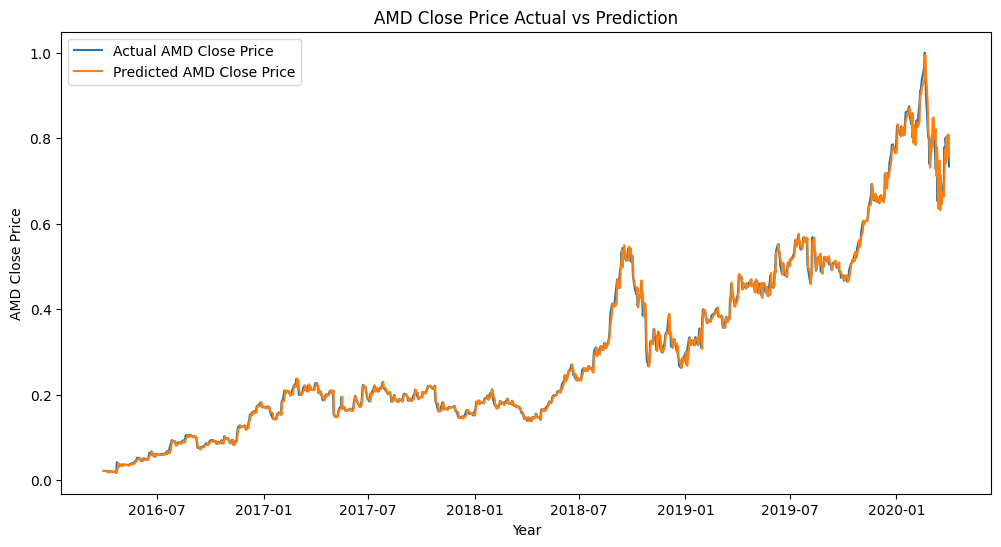

In [31]:
#For plotting
y_pred= model2.predict(X_test)
y_test_index = data.index[-len(y_test):]  # Assuming 'data' is the original dataframe
y_pred_index = data.index[-len(y_pred):]  # Assuming 'data' is the original dataframe
#Ploting predicted vs actual
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(y_test_index, y_test, label='Actual AMD Close Price')
plt.plot(y_pred_index, y_pred, label='Predicted AMD Close Price')
plt.title('AMD Close Price Actual vs Prediction')
plt.xlabel('Year')
plt.ylabel('AMD Close Price')
plt.legend()
plt.show()

Bisa dilihat dari hasil ploting modeling 2 menunjukan bahwa prediksi close price berhasil dilakukan dengan diagram menunjukan predicted price mempunyai pola yang sama dengan actual dan tidak adanya miss terlalu jauh

---



**Modeling AAPL**

Modeling AAPL Data set menggunakan parameter Modeling 2 dari AMD sebelumnya

In [32]:
# Extract the 'Close' column from the 'amd' DataFrame
data = aapl[['Close']]

# # # Convert the index to datetime
data.index = pd.to_datetime(data.index)

# Extract the values of the 'Close' column
dataset = data['Close'].values

# Scale the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

scaled_data

array([[9.69299159e-04],
       [8.87386505e-04],
       [7.78169755e-04],
       ...,
       [7.78626234e-01],
       [7.77036025e-01],
       [7.36119074e-01]])

In [33]:
# Define window size and horizon
window_size = 5
horizon = 1

# Separate the dataset into input (X) and output (y) with window size and horizon
X = []
y = []
for i in range(window_size, len(scaled_data) - horizon + 1):
    X.append(scaled_data[i - window_size:i, 0])
    y.append(scaled_data[i + horizon - 1, 0])

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into train, validation, and test sets (80:10:10)
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, shuffle=False)

print("Train set shapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print()
print("Validation set shapes:")
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print()
print("Test set shapes:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Train set shapes:
X_train shape: (7923, 5)
y_train shape: (7923,)

Validation set shapes:
X_val shape: (990, 5)
y_val shape: (990,)

Test set shapes:
X_test shape: (991, 5)
y_test shape: (991,)


In [34]:
# Define the modified LSTM model with additional layers or different hyperparameters
model = Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1))

# Compile the modified model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the modified model
model.fit(X_train, y_train, epochs=100, batch_size=86, validation_data=(X_val, y_val))

Epoch 1/100
93/93 [==============================] - 3s 17ms/step - loss: 2.0148e-04 - val_loss: 1.4633e-04
Epoch 2/100
93/93 [==============================] - 1s 14ms/step - loss: 2.3255e-06 - val_loss: 9.2165e-05
Epoch 3/100
93/93 [==============================] - 1s 16ms/step - loss: 2.2147e-06 - val_loss: 6.7916e-05
Epoch 4/100
93/93 [==============================] - 1s 15ms/step - loss: 2.3663e-06 - val_loss: 6.7584e-05
Epoch 5/100
93/93 [==============================] - 1s 14ms/step - loss: 2.2314e-06 - val_loss: 7.1933e-05
Epoch 6/100
93/93 [==============================] - 2s 25ms/step - loss: 2.3286e-06 - val_loss: 1.7036e-04
Epoch 7/100
93/93 [==============================] - 2s 23ms/step - loss: 2.7495e-06 - val_loss: 7.6018e-05
Epoch 8/100
93/93 [==============================] - 2s 17ms/step - loss: 2.1648e-06 - val_loss: 7.3652e-05
Epoch 9/100
93/93 [==============================] - 1s 14ms/step - loss: 2.8018e-06 - val_loss: 1.0021e-04
Epoch 10/100
93/93 [========

In [51]:
# make a prediction
model_pred = model.predict(X_test)

# Reshape X_test and y_test for concatenation
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1]))
y_test_reshaped = y_test.reshape((len(y_test), 1))

# Invert scaling for forecast
inv_y_pred= np.concatenate((model_pred, X_test_reshaped), axis=1)
inv_y_pred= scaler.inverse_transform(inv_y_pred)
inv_y_pred= inv_y_pred[:, 0]

# Invert scaling for actual
inv_y = np.concatenate((y_test_reshaped, X_test_reshaped), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]

31/31 [==============================] - 0s 4ms/step


In [36]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_y_pred))

# Calculate MAE
mae = mean_absolute_error(inv_y, inv_y_pred)

# Calculate MAPE
mape = np.mean(np.abs((inv_y - inv_y_pred) / inv_y)) * 100

# Print the evaluation metrics
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f' % mape)

Test RMSE: 3.856
Test MAE: 2.388
Test MAPE: 1.281


In [37]:
#Show Actual vs Predicted
result_comp = pd.DataFrame(list(zip(inv_y, inv_y_pred)),
               columns =['Actual Close Price', 'Predicted Close Price'])
result_comp

,Actual Close Price,Predicted Close Price
0,104.349998,105.462511
1,97.820000,104.794440
2,94.830002,99.948633
3,93.739998,96.341524
4,93.639999,94.700300
...,...,...
986,258.440002,243.224051
987,247.740005,253.055726
988,254.809998,249.058603
989,254.289993,252.723503


Dapat dilihat ternyata menggunakan parameter seperti LSTM sebelumnya cukup menghasikan metrics eval yang sudah baik, tetapi disini saya akan mencoba memodifikasi agar mendapat hasil lebih rendah

**Modifikasi LSTM AAPL**

Model 2

LSTM MODEL 2:
Saya memodifikasi dengan cara menambahkan layer LSTM tambahan dengan epoch 50 dan mengubah batch size menjadi 32. Selain itu, saya juga akan menambahkan layer Dense tambahan dengan aktivasi 'relu' dan jumlah unit 64.

In [39]:
# Build the LSTM model
model2 = Sequential()
model2.add(LSTM(128, return_sequences=True, input_shape= (window_size, 1)))
model2.add(LSTM(64, return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
248/248 [==============================] - 10s 21ms/step - loss: 9.1252e-05 - val_loss: 9.8724e-05
Epoch 2/50
248/248 [==============================] - 6s 24ms/step - loss: 4.6730e-06 - val_loss: 8.2370e-05
Epoch 3/50
248/248 [==============================] - 4s 18ms/step - loss: 5.5568e-06 - val_loss: 7.4492e-04
Epoch 4/50
248/248 [==============================] - 7s 29ms/step - loss: 5.3543e-06 - val_loss: 6.1675e-05
Epoch 5/50
248/248 [==============================] - 4s 15ms/step - loss: 5.5590e-06 - val_loss: 8.5314e-05
Epoch 6/50
248/248 [==============================] - 4s 17ms/step - loss: 5.8494e-06 - val_loss: 5.4538e-05
Epoch 7/50
248/248 [==============================] - 7s 26ms/step - loss: 3.7321e-06 - val_loss: 5.9826e-05
Epoch 8/50
248/248 [==============================] - 5s 19ms/step - loss: 4.5307e-06 - val_loss: 6.7027e-05
Epoch 9/50
248/248 [==============================] - 5s 21ms/step - loss: 4.9293e-06 - val_loss: 1.2524e-04
Epoch 10/50
248/24

In [40]:
# make a prediction
model_pred = model2.predict(X_test)

# Reshape X_test and y_test for concatenation
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1]))
y_test_reshaped = y_test.reshape((len(y_test), 1))

# Invert scaling for forecast
inv_y_pred= np.concatenate((model_pred, X_test_reshaped), axis=1)
inv_y_pred= scaler.inverse_transform(inv_y_pred)
inv_y_pred= inv_y_pred[:, 0]

# Invert scaling for actual
inv_y = np.concatenate((y_test_reshaped, X_test_reshaped), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]

31/31 [==============================] - 1s 6ms/step


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse2 = np.sqrt(mean_squared_error(inv_y, inv_y_pred))

# Calculate MAE
mae2 = mean_absolute_error(inv_y, inv_y_pred)

# Calculate MAPE
mape2 = np.mean(np.abs((inv_y - inv_y_pred) / inv_y)) * 100

# Print the evaluation metrics
print('Test RMSE: %.3f' % rmse2)
print('Test MAE: %.3f' % mae2)
print('Test MAPE: %.3f' % mape2)


Test RMSE: 4.788
Test MAE: 2.907
Test MAPE: 1.457


In [42]:
#Show Actual vs Predicted
result_comp2 = pd.DataFrame(list(zip(inv_y, inv_y_pred)),
               columns =['Actual Close Price', 'Predicted Close Price'])
result_comp2

,Actual Close Price,Predicted Close Price
0,104.349998,106.011034
1,97.820000,105.318015
2,94.830002,99.036974
3,93.739998,96.762957
4,93.639999,95.629218
...,...,...
986,258.440002,239.560945
987,247.740005,252.271527
988,254.809998,240.997036
989,254.289993,250.481753


In [45]:
# Print the evaluation metrics
print("LSTM MODEL 1")
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f' % mape)
print()
# Print the evaluation metrics
print("LSTM MODEL 2")
print('Test RMSE: %.3f' % rmse2)
print('Test MAE: %.3f' % mae2)
print('Test MAPE: %.3f' % mape2)

LSTM MODEL 1
Test RMSE: 3.856
Test MAE: 2.388
Test MAPE: 1.281

LSTM MODEL 2
Test RMSE: 4.788
Test MAE: 2.907
Test MAPE: 1.457


Dilihat dari metrik yang disediakan, kita dapat melihat perbedaan kinerja antara kedua model ini.

Model LSTM 2 memiliki nilai RMSE yang lebih tinggi, yaitu sebesar 4.788. Ini menunjukkan bahwa prediksi model ini memiliki kesalahan rata-rata yang lebih besar dalam memprediksi close price dibandingkan dengan model LSTM 1 yang memiliki RMSE sebesar 3.856. Dengan kata lain, model LSTM 1 cenderung memberikan hasil prediksi yang lebih dekat dengan close price yang sebenarnya.

Selain itu, model LSTM 1 juga memiliki nilai MAE dan MAPE yang lebih rendah dibandingkan dengan model LSTM 2. MAE pada model LSTM 1 adalah 2.388, yang menunjukkan bahwa rata-rata kesalahan absolut dalam prediksi close price cenderung lebih kecil dibandingkan dengan model LSTM 2 yang memiliki MAE 2.907. Sementara itu, MAPE pada model LSTM 1 adalah 1.281, yang menunjukkan bahwa rata-rata persentase kesalahan absolut dalam prediksi close price juga lebih rendah dibandingkan dengan model LSTM 2 yang memiliki MAPE 1.457.

Berdasarkan analisis ini, dapat disimpulkan bahwa model LSTM 1 lebih baik dalam memprediksi close price pada dataset pasar saham. Model ini memberikan hasil prediksi yang lebih akurat dengan nilai RMSE, MAE, dan MAPE yang lebih rendah dibandingkan dengan model LSTM 2.

In [44]:
# Print all  modeling results
print("Model 1 Results:")
print(result_comp)

print("\nModel 2 Results:")
print(result_comp2)

Model 1 Results:
     Actual Close Price  Predicted Close Price
0            104.349998             105.462511
1             97.820000             104.794440
2             94.830002              99.948633
3             93.739998              96.341524
4             93.639999              94.700300
..                  ...                    ...
986          258.440002             243.224051
987          247.740005             253.055726
988          254.809998             249.058603
989          254.289993             252.723503
990          240.910004             253.436637

[991 rows x 2 columns]

Model 2 Results:
     Actual Close Price  Predicted Close Price
0            104.349998             106.011034
1             97.820000             105.318015
2             94.830002              99.036974
3             93.739998              96.762957
4             93.639999              95.629218
..                  ...                    ...
986          258.440002             239.560945
9

Berdasarkan analisis ini, dapat disimpulkan bahwa model LSTM 1 lebih baik dalam memprediksi close price pada dataset stock marker, maka saya menggunakan model 2 untu final model lalu melakukan ploting model

31/31 [==============================] - 0s 6ms/step


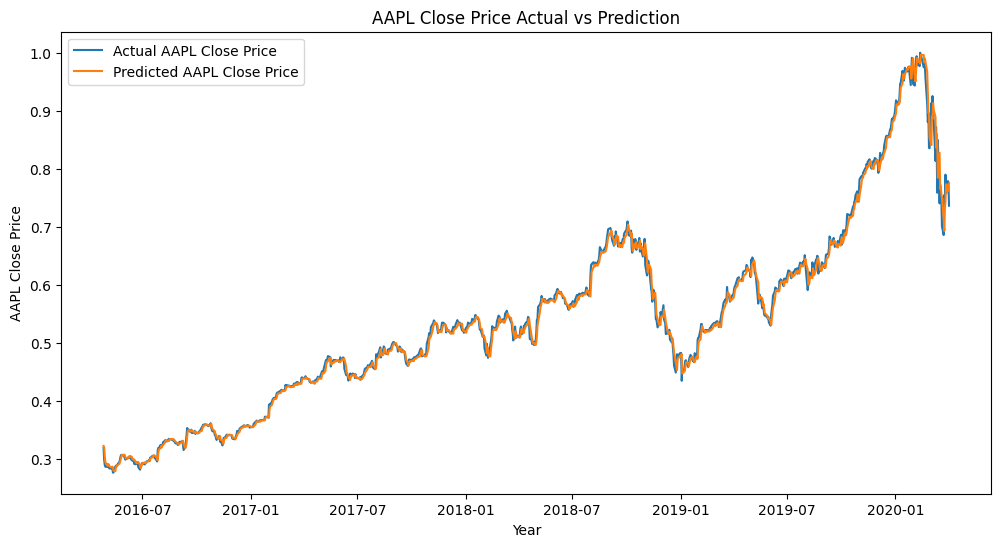

In [53]:
#For plotting
y_pred= model.predict(X_test)
y_test_index = data.index[-len(y_test):]
y_pred_index = data.index[-len(y_pred):]
#Ploting predicted vs actual
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(y_test_index, y_test, label='Actual AAPL Close Price')
plt.plot(y_pred_index, y_pred, label='Predicted AAPL Close Price')
plt.title('AAPL Close Price Actual vs Prediction')
plt.xlabel('Year')
plt.ylabel('AAPL Close Price')
plt.legend()
plt.show()

Bisa dilihat dari hasil ploting modeling 2 pada dataset aapl menunjukan bahwa prediksi close price berhasil dilakukan dengan diagram menunjukan predicted price mempunyai pola yang sama dengan actual